## Version Description:
 * In this version - we predict just the __MTR Hole Diameter__ (`R600_HD`) in TZ6 using [Bayesian Neural Network Ensembling](https://github.com/TeaPearce/Bayesian_NN_Ensembles/blob/master/notebook_examples/keras_regression.ipynb?fbclid=IwAR245ooffs-UvrG1mtnnK55IfN1g03A5S-jgzW6Kqlk7LJzT9nbbIS27WuU). 
 * Artificial data points similar to LTR data distribution are used to train the ML model. 
 * The input features are `TZ6_Flow`,`MIXP`,`AMBP`,`AMBT` and the TZ6 CLR Restrictors.

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [2]:
import pandas as pd
import numpy as np

#Set some numpy print options for displaying numpy arrays to fit maximum width of cell
np.set_printoptions(precision=3, edgeitems=30, linewidth=1000,formatter=dict(float=lambda x: "%.6g" % x)) 
from functools import reduce

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg' 
plt.style.use('seaborn-whitegrid')

In [4]:
import warnings
warnings.filterwarnings("ignore")

### Loading Data

In [5]:
input_features = ['TZ_Flow','MIXP','AMBP','AMBT','R610_HS1','R611_HS1','R612_HS1','R613_HS1']
usecols = ['HoV']+input_features+['R600_HD']

In [6]:
ASD_df = pd.read_csv('../../data/ASD_dataset.csv', usecols = usecols)[usecols]
ASD_df.head()

,HoV,TZ_Flow,MIXP,AMBP,AMBT,R610_HS1,R611_HS1,R612_HS1,R613_HS1,R600_HD
0,ASD0,887.843325,2696.2864,101444.530,299.057324,131,136,120,120,148
1,ASD1,887.477250,2615.7850,101391.560,298.509995,131,136,120,120,148
2,ASD2,887.476875,2648.8844,101513.720,298.961758,131,136,120,120,148
3,ASD3,886.590375,2592.1955,101393.790,298.661206,131,136,120,120,148
4,ASD4,888.331625,2654.4529,101460.547,299.539189,131,136,120,120,148


### Scaling and Normalizing the Data:

In [7]:
from sklearn.preprocessing import MinMaxScaler
## Common MinMaxScaler for both input and output variables.
# scaler = MinMaxScaler()

## Separate MinMaxScaler for both input and output variables.
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler() 

In [8]:
# Rescale Data
df_rescaled = ASD_df.copy()
df_rescaled.drop(columns=['HoV'],inplace = True) # Drop 'HoV' column as this column with categorical labels 

In [9]:
# Scale all columns with common scaler
# colnames_all = list(df_rescaled)
# df_rescaled[colnames_all] = scaler.fit_transform(df_rescaled[colnames_all])

# Scale input and output features using separate scalers
df_rescaled[input_features] = scaler_x.fit_transform(df_rescaled[input_features].astype(np.float))
df_rescaled[['R600_HD']] = scaler_y.fit_transform(df_rescaled[['R600_HD']].astype(np.float))

In [10]:
print('Rescaled Input Dataframe:')
df_rescaled

Rescaled Input Dataframe:


,TZ_Flow,MIXP,AMBP,AMBT,R610_HS1,R611_HS1,R612_HS1,R613_HS1,R600_HD
0,0.244608,0.722128,0.438875,0.771366,0.481481,0.451613,0.5,0.50,0.142857
1,0.240608,0.543484,0.423140,0.714307,0.481481,0.451613,0.5,0.50,0.142857
2,0.240604,0.616936,0.459430,0.761403,0.481481,0.451613,0.5,0.50,0.142857
3,0.230917,0.491135,0.423802,0.730071,0.481481,0.451613,0.5,0.50,0.142857
4,0.249944,0.629294,0.443634,0.821600,0.481481,0.451613,0.5,0.50,0.142857
5,0.237766,0.455875,0.410126,0.767871,0.481481,0.451613,0.5,0.50,0.142857
6,0.241122,0.420090,0.398339,0.889279,0.481481,0.451613,0.5,0.50,0.142857
7,0.217256,0.526771,0.401614,0.776222,0.481481,0.451613,0.5,0.50,0.142857
8,0.243649,0.500137,0.415183,0.766209,0.481481,0.451613,0.5,0.50,0.142857
9,0.219737,0.540438,0.434396,0.883847,0.481481,0.451613,0.5,0.50,0.142857


**Train BNN Ensemble with artificially synthesized data**

In [11]:
# Extract pandas dataframe values to numpy array
train_data= df_rescaled.values

# Separate arrays into input and output components (predictors and response variables)
x_train, y_train  = train_data[:,:-1] ,train_data[:,-1:]
print(x_train.shape, y_train.shape)

(1995, 8) (1995, 1)


### Bayesian Ensembling

In [12]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense,Dropout, Activation

Using TensorFlow backend.


In [13]:
# BNN Ensemble Hyperparamters
n_ensemble = 10 # no. NNs in ensemble
reg = 'anc'   # type of regularisation to use - anc (anchoring) reg (regularised) free (unconstrained)
n_hidden = 40 # no. hidden units in NN
activation_in = 'tanh' # tanh relu sigmoid
data_noise = 0.001 # estimated noise variance
n_data = 6

# optimisation options
epochs = 200  # run reg for 15+ epochs seems to mess them up
l_rate = 0.001 # learning rate

# variance of priors
W1_var = 20/1  # 1st layer weights and biases
W_mid_var = 1/n_hidden # 2nd layer weights and biases
W_last_var = 1/n_hidden # 3rd layer weights    

In [14]:
# NN object
def fn_make_NN(reg='anc', activation_in='relu'):
    # get initialisations, and regularisation values
    W1_lambda = data_noise/W1_var
    W1_anc = np.random.normal(loc=0,scale=np.sqrt(W1_var),size=[1,n_hidden])
    W1_init = np.random.normal(loc=0,scale=np.sqrt(W1_var),size=[1,n_hidden])

    b1_var = W1_var
    b1_lambda =  data_noise/b1_var
    b1_anc = np.random.normal(loc=0,scale=np.sqrt(b1_var),size=[n_hidden])
    b1_init = np.random.normal(loc=0,scale=np.sqrt(b1_var),size=[n_hidden])

    W_mid_lambda = data_noise/W_mid_var
    W_mid_anc = np.random.normal(loc=0,scale=np.sqrt(W_mid_var),size=[n_hidden,n_hidden])
    W_mid_init = np.random.normal(loc=0,scale=np.sqrt(W_mid_var),size=[n_hidden,n_hidden])

    b_mid_var = W_mid_var
    b_mid_lambda =  data_noise/b_mid_var
    b_mid_anc = np.random.normal(loc=0,scale=np.sqrt(b_mid_var),size=[n_hidden])
    b_mid_init = np.random.normal(loc=0,scale=np.sqrt(b_mid_var),size=[n_hidden])
    
    W_last_lambda = data_noise/W_last_var
    W_last_anc = np.random.normal(loc=0,scale=np.sqrt(W_last_var),size=[n_hidden, 1])
    W_last_init = np.random.normal(loc=0,scale=np.sqrt(W_last_var),size=[n_hidden, 1])

    # create custom regularised
    def custom_reg_W1(weight_matrix):
        if reg == 'reg':
            return K.sum(K.square(weight_matrix)) * W1_lambda/n_data
        elif reg == 'free':
            return 0.
        elif reg == 'anc':
            return K.sum(K.square(weight_matrix - W1_anc)) * W1_lambda/n_data

    def custom_reg_b1(weight_matrix):
        if reg == 'reg':
            return K.sum(K.square(weight_matrix)) * b1_lambda/n_data
        elif reg == 'free':
            return 0.
        elif reg == 'anc':
            return K.sum(K.square(weight_matrix - b1_anc)) * b1_lambda/n_data

    def custom_reg_W_mid(weight_matrix):
        if reg == 'reg':
            return K.sum(K.square(weight_matrix)) * W_mid_lambda/n_data
        elif reg == 'free':
            return 0.
        elif reg == 'anc':
            return K.sum(K.square(weight_matrix - W_mid_anc)) * W_mid_lambda/n_data

    def custom_reg_b_mid(weight_matrix):
        if reg == 'reg':
            return K.sum(K.square(weight_matrix)) * b_mid_lambda/n_data
        elif reg == 'free':
            return 0.
        elif reg == 'anc':
            return K.sum(K.square(weight_matrix - b_mid_anc)) * b_mid_lambda/n_data

    def custom_reg_W_last(weight_matrix):
        if reg == 'reg':
            return K.sum(K.square(weight_matrix)) * W_last_lambda/n_data
        elif reg == 'free':
            return 0.
        elif reg == 'anc':
            return K.sum(K.square(weight_matrix - W_last_anc)) * W_last_lambda/n_data

    model = Sequential()
    model.add(Dense(n_hidden, activation=activation_in, input_shape=(len(input_features),),
                    kernel_initializer=keras.initializers.Constant(value=W1_init),
                    bias_initializer=keras.initializers.Constant(value=b1_init),
                    kernel_regularizer=custom_reg_W1,
                    bias_regularizer=custom_reg_b1))

    model.add(Dense(n_hidden, activation=activation_in, 
                    kernel_initializer=keras.initializers.Constant(value=W_mid_init),
                    bias_initializer=keras.initializers.Constant(value=b_mid_init),
                    kernel_regularizer=custom_reg_W_mid,
                    bias_regularizer=custom_reg_b_mid))

    model.add(Dense(1, activation='linear',use_bias=False,
                    kernel_initializer=keras.initializers.Constant(value=W_last_init),
                    kernel_regularizer=custom_reg_W_last))

    model.compile(loss='mean_squared_error',optimizer=keras.optimizers.Adam(lr=l_rate))
    return model


def fn_predict_ensemble(NNs, x_test):
    ''' fn to predict given a list of NNs (an ensemble)''' 
    y_preds = []
    for m in range(len(NNs)):
        y_preds.append(NNs[m].predict(x_test, verbose=0))
    y_preds = np.array(y_preds)
#     y_preds_mu = np.mean(y_preds,axis=0)
#     y_preds_std = np.std(y_preds,axis=0)
#     return y_preds, y_preds_mu, y_preds_std
    return y_preds

In [15]:
# create the NNs
NNs=[]
for m in range(n_ensemble):
    NNs.append(fn_make_NN(reg=reg, activation_in=activation_in))
print(NNs[-1].summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 40)                360       
_________________________________________________________________
dense_29 (Dense)             (None, 40)                1640      
_________________________________________________________________
dense_30 (Dense)             (None, 1)                 40        
Total params: 2,040
Trainable params: 2,040
Non-trainable params: 0
_________________________________________________________________
None


In [16]:
%%time
# Do training with Simulation data
NNs_hist_train=[];
for m in range(n_ensemble):
    print('-- training: ' + str(m+1) + ' of ' + str(n_ensemble) + ' NNs --')
    hist = NNs[m].fit(x_train,y_train,batch_size=n_data,epochs=epochs,verbose=0)
    NNs_hist_train.append(hist.history['loss'])

-- training: 1 of 10 NNs --
-- training: 2 of 10 NNs --
-- training: 3 of 10 NNs --
-- training: 4 of 10 NNs --
-- training: 5 of 10 NNs --
-- training: 6 of 10 NNs --
-- training: 7 of 10 NNs --
-- training: 8 of 10 NNs --
-- training: 9 of 10 NNs --
-- training: 10 of 10 NNs --
Wall time: 8min 28s


Wall time: 22.2 ms


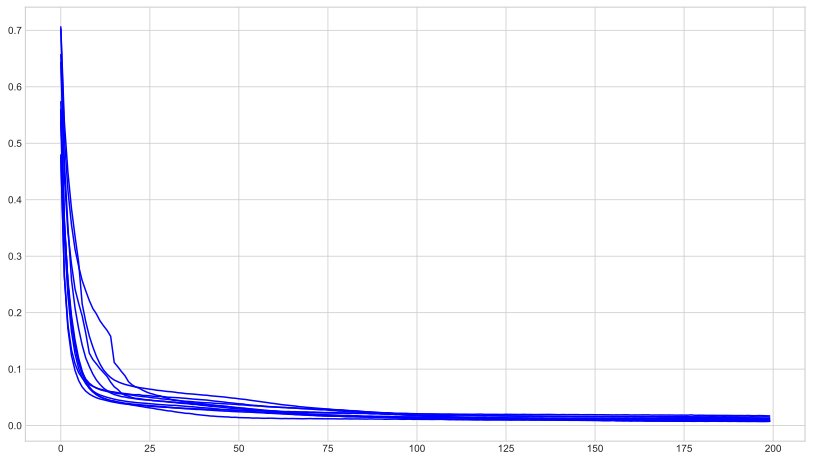

In [17]:
%%time
# check how training looked
NNs_hist_train=np.array(NNs_hist_train)
fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(111)
for m in range(n_ensemble):
    ax.plot(NNs_hist_train[m], color='b',label='train')

### Make Predictions with LTR data

In [18]:
LTR_df = pd.read_csv('../../data/LTR_dataset.csv', usecols = usecols)[usecols]
LTR_df.head()

,HoV,TZ_Flow,MIXP,AMBP,AMBT,R610_HS1,R611_HS1,R612_HS1,R613_HS1,R600_HD
0,A1,887.134249,2600.0000,101401.6000,299.386667,131,136,120,120,148
1,A2,886.764050,2600.0000,101576.3000,298.448667,131,136,120,120,149
2,A3,926.224856,2606.1928,102136.6035,297.109024,131,136,114,120,152
3,A4,915.139474,2599.8998,103195.6642,295.060027,131,136,120,120,154
4,A5,891.635528,2600.0000,102856.2000,294.755833,145,153,130,130,148


In [19]:
# Rescale LTR Data
LTR_df_rescaled = LTR_df.copy()
LTR_df_rescaled.drop(columns=['HoV'],inplace = True) # Drop 'HoV' column as this column with categorical labels 

# Scale input and output features using separate scalers
LTR_df_rescaled[input_features] = scaler_x.fit_transform(LTR_df_rescaled[input_features])
LTR_df_rescaled[['R600_HD']] = scaler_y.fit_transform(LTR_df_rescaled[['R600_HD']])
LTR_df_rescaled.head()

,TZ_Flow,MIXP,AMBP,AMBT,R610_HS1,R611_HS1,R612_HS1,R613_HS1,R600_HD
0,0.227805,0.254798,0.418091,0.949794,0.481481,0.451613,0.5,0.5,0.142857
1,0.223593,0.254798,0.474755,0.806945,0.481481,0.451613,0.5,0.5,0.214286
2,0.672487,0.394775,0.656491,0.602928,0.481481,0.451613,0.2,0.5,0.428571
3,0.546383,0.252533,1.000000,0.290882,0.481481,0.451613,0.5,0.5,0.571429
4,0.279010,0.254798,0.889894,0.244556,1.000000,1.000000,1.0,1.0,0.142857


In [20]:
LTR_X, y_true =  LTR_df_rescaled.iloc[:,:-1].values, LTR_df['R600_HD'].values
print(LTR_X.shape, y_true.shape)

(34, 8) (34,)


In [21]:
def output_reversescaler(predictions_scaled):
    '''Custom Function to Inverse Scale Predictions from BNN'''
    predictions = []
    for i in range(len(predictions_scaled)):
        data_scaled = predictions_scaled[i]
        data_unscaled = scaler_y.inverse_transform(data_scaled).ravel()
#         data_unscaled = np.concatenate(scaler_y.inverse_transform(data_scaled)).ravel().tolist()
        predictions.append(data_unscaled)
    return np.asarray(predictions)

In [22]:
# Make Predictions
y_preds_scaled = fn_predict_ensemble(NNs,LTR_X)
y_preds = output_reversescaler(y_preds_scaled)

In [23]:
print('Length of Y_Predictions:',len(y_preds))
print('Y_Predictions:')
print(y_preds[0:2],'...')

Length of Y_Predictions: 10
Y_Predictions:
[[149.52 149.28 152.657 154.675 149.98 148.042 147.652 152.577 152.005 149.739 152.439 153.39 151.382 148.226 148.319 149.784 146.548 146.564 149.338 150.063 152.29 147.76 153.624 153.205 153.902 148.275 148.674 154.836 148.369 149.873 150.969 160.151 147.375 148.618]
 [149.223 148.951 152.725 154.74 148.153 148.596 148.049 152.891 152.279 149.338 152.272 153.965 151.25 147.909 148.154 149.256 145.687 145.445 147.648 147.474 151.986 147.783 154.263 154.398 154.188 148.079 148.45 154.91 148.127 149.854 150.203 160.62 146.947 148.319]] ...


In [24]:
y_preds[0].shape

(34,)

In [25]:
# Manual Check of means of a random Column of y_preds array
x = []
for i in range(len(y_preds)):
    element = y_preds[i][0] # first index specifies array number, seconds index specifies the index of element inside the array
    x.append(element)
print('First Column elements:',x)
print('Mean:',np.mean(x))

First Column elements: [149.52008, 149.22281, 149.26852, 149.21222, 148.88815, 148.77086, 149.48566, 149.68839, 148.71422, 148.67728]
Mean: 149.1448


In [26]:
HoV_test_data = LTR_df['HoV'].values

y_mins = np.amin(y_preds,axis = 0) # axis = 0 computes measures across columns 
y_maxes = np.amax(y_preds, axis = 0 )
y_mu = np.mean(y_preds,axis = 0)
y_std = np.std(y_preds,axis = 0)

In [27]:
print('Length of Y_Predictions_Mu',len(y_mu))
print('No. of Test HoVs:',len(HoV_test_data),'\nHoVs of Test Points:',HoV_test_data)
print('\nTest Points-Org Y:', y_true)
print('\nY_Predictions_Mu:', y_mu)
print('\nY_Predictions_Std:', y_std)

Length of Y_Predictions_Mu 34
No. of Test HoVs: 34 
HoVs of Test Points: ['A1' 'A2' 'A3' 'A4' 'A5' 'A6' 'C1' 'C2' 'C3' 'C4' 'C5' 'C6' 'D1' 'D2' 'E1' 'E2' 'F1' 'F2' 'F3' 'H1' 'I1' 'J1' 'M1' 'M2' 'P1' 'Q1' 'Q2' 'S1' 'S2' 'S3' 'S4' 'S5' 'T1' 'T2']

Test Points-Org Y: [148 149 152 154 148 148 148 153 152 150 152 154 151 148 148 148 146 146 148 148 152 148 154 154 154 148 148 155 148 150 150 160 148 148]

Y_Predictions_Mu: [149.145 148.998 152.468 154.103 148.737 148.167 147.796 153.001 152.193 149.5 152.209 153.883 151.173 147.752 148.041 149.528 145.921 145.793 148.017 148.041 152.202 147.316 153.94 153.724 154.198 147.812 148.838 155.072 148.422 149.686 150.388 160.274 147.083 148.306]

Y_Predictions_Std: [0.344691 0.261031 0.191286 0.377187 0.705612 0.673861 0.740519 0.275174 0.28692 0.367742 0.183604 0.28395 0.185997 0.403277 0.335623 0.22482 0.330816 0.350925 0.514745 0.933223 0.369675 0.371237 0.231584 0.505171 0.327113 0.894329 0.323566 0.21327 0.30694 0.276639 0.343682 0.264962 0.3

### Plot BNN Predictions with Mean and Error Bars

In [28]:
from bokeh.models import CategoricalColorMapper,HoverTool,ColumnDataSource,Label,Range1d
from bokeh.plotting import figure, show, output_file,output_notebook
output_notebook()

Loading BokehJS ...

In [29]:
# create the coordinates for the errorbars
y_xs = []
ys_std = []
y_ys = []

for x, y_mean,std,min_dia, max_dia in zip(HoV_test_data,y_mu,y_std,y_mins,y_maxes):
    y_xs.append((x, x))
    ys_std.append((y_mean - std, y_mean + std))
    y_ys.append((y_mean - (y_mean - min_dia), y_mean + (max_dia - y_mean)))

In [30]:
# plot the points
f = figure(x_range=HoV_test_data, title='Bayesian Ensembling - Dia Predictions with Confidence Interval', width=1400)
dot_hover_tooltips = HoverTool(names=['DiaPoints'],tooltips=[("HoV","@x"),("Dia", "@y mm")])
whisker_hover_tooltips = HoverTool(names=['Whiskers'],tooltips=[("Dia", "@y mm")])
# multiline_hover_tooltips = HoverTool(names=['LinePlot'],tooltips=[("Dia", "$y mm")])

f.add_tools(dot_hover_tooltips)

f.xaxis.axis_label = 'Head of Versions'
f.yaxis.axis_label = 'Diameter Predictions (mm)'

f.multi_line(y_xs, ys_std, color='blue', line_width = 3, legend = 'Mean Prediction +/- Std.Dev')
f.multi_line(y_xs, y_ys, color='deepskyblue',name='LinePlot',legend = 'Mean Prediction +/- Min & Max Value')
f.diamond(HoV_test_data, y_true, color='red', size=12, line_alpha=0,name='DiaPoints', legend = 'True Dia')
f.circle(HoV_test_data, y_mu, color='blue', size=9, line_alpha=0,name='DiaPoints', legend = 'Predicted Dia (Mean)')

# whiskers (almost-0 height rects simpler than segments)
for i in range(len(y_xs)):
    f.rect(y_xs[i], y_ys[i], 0.2, 0.001, line_color="deepskyblue",name='Whiskers')

f.y_range=Range1d(135, 165)
f.legend.location = "top_center"
f.legend.click_policy="hide"
output_file('plots/BNN_Ensembling_v3_ASD_LTR_Predictions.html', mode='inline')

In [31]:
show(f)